In [1]:
import pandas as pd

# Load the feature-engineered dataset
feature_engineered_path = 'data/processed/feature_engineered_dataset.parquet'
feature_engineered_data = pd.read_parquet(feature_engineered_path)

# Display the first few rows of the dataset
print(feature_engineered_data.head())


         Date Ticker       Open       High        Low      Close     Volume  \
0  2014-07-01   AAPL  23.379999  23.517500  23.282499  23.379999  152892000   
1  2014-07-02   AAPL  23.467501  23.514999  23.272499  23.370001  113860000   
2  2014-07-03   AAPL  23.417500  23.525000  23.299999  23.507500   91567200   
3  2014-07-07   AAPL  23.535000  23.997499  23.525000  23.992500  225872000   
4  2014-07-08   AAPL  24.067499  24.200001  23.480000  23.837500  260888000   

   Sentiment     DJI_Close  VIX_Close  CL=F_Close   GC=F_Close   SPY_Close  \
0        0.0  16956.070312      11.15  105.339996  1326.400024  197.029999   
1        0.0  16976.240234      10.82  104.480003  1330.699951  197.229996   
2        0.0  17068.259766      10.32  104.059998  1320.400024  198.199997   
3        0.0  17024.210938      11.33  103.529999  1316.500000  197.509995   
4        0.0  16906.619141      11.98  103.400002  1316.000000  196.240005   

     Return     MA_5  MA_20  Volatility  
0  0.000000   

In [3]:
pip install pandas numpy scikit-learn joblib


  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached scipy-1.14.0-cp311-cp311-win_amd64.whl (44.7 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import site
site.getsitepackages()


['C:\\Users\\rahul\\Desktop\\Project_Algo\\env',
 'C:\\Users\\rahul\\Desktop\\Project_Algo\\env\\Lib\\site-packages']

In [13]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load the feature-engineered dataset
feature_engineered_path = 'data/processed/feature_engineered_dataset.parquet'
feature_engineered_data = pd.read_parquet(feature_engineered_path)

# Display the first few rows of the dataset
print(feature_engineered_data.head())

# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'MA_5', 'MA_20', 'Volatility']
target = 'Return'

# Split the data into training and testing sets
X = feature_engineered_data[features]
y = feature_engineered_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Define thresholds for trading decisions
buy_threshold = 0.01
sell_threshold = -0.01

# Make trading decisions based on model predictions
feature_engineered_data['Prediction'] = model.predict(feature_engineered_data[features])
feature_engineered_data['Decision'] = np.where(feature_engineered_data['Prediction'] > buy_threshold, 'Buy',
                                               np.where(feature_engineered_data['Prediction'] < sell_threshold, 'Sell', 'Hold'))

# Display the first few rows with trading decisions
print(feature_engineered_data[['Date', 'Ticker', 'Prediction', 'Decision']].head())

# Save the trained model
model_path = 'data/processed/trained_model.pkl'
joblib.dump(model, model_path)

# Save the dataset with predictions and decisions
predictions_path = 'data/processed/predictions_with_decisions.parquet'
feature_engineered_data.to_parquet(predictions_path, index=False)

# Confirm the files are saved
print(f"Trained model saved to {model_path}")
print(f"Dataset with predictions and decisions saved to {predictions_path}")


         Date Ticker       Open       High        Low      Close     Volume  \
0  2014-07-01   AAPL  23.379999  23.517500  23.282499  23.379999  152892000   
1  2014-07-02   AAPL  23.467501  23.514999  23.272499  23.370001  113860000   
2  2014-07-03   AAPL  23.417500  23.525000  23.299999  23.507500   91567200   
3  2014-07-07   AAPL  23.535000  23.997499  23.525000  23.992500  225872000   
4  2014-07-08   AAPL  24.067499  24.200001  23.480000  23.837500  260888000   

   Sentiment     DJI_Close  VIX_Close  CL=F_Close   GC=F_Close   SPY_Close  \
0        0.0  16956.070312      11.15  105.339996  1326.400024  197.029999   
1        0.0  16976.240234      10.82  104.480003  1330.699951  197.229996   
2        0.0  17068.259766      10.32  104.059998  1320.400024  198.199997   
3        0.0  17024.210938      11.33  103.529999  1316.500000  197.509995   
4        0.0  16906.619141      11.98  103.400002  1316.000000  196.240005   

     Return     MA_5  MA_20  Volatility  
0  0.000000   

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the feature-engineered dataset
data_path = 'data/processed/feature_engineered_dataset.parquet'
df = pd.read_parquet(data_path)

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Define the features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'DJI_Close', 'VIX_Close', 
            'CL=F_Close', 'GC=F_Close', 'SPY_Close', 'MA_5', 'MA_20', 'Volatility']
target = 'Return'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0003121694410394703
R^2 Score: 0.3176192461238918


In [18]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


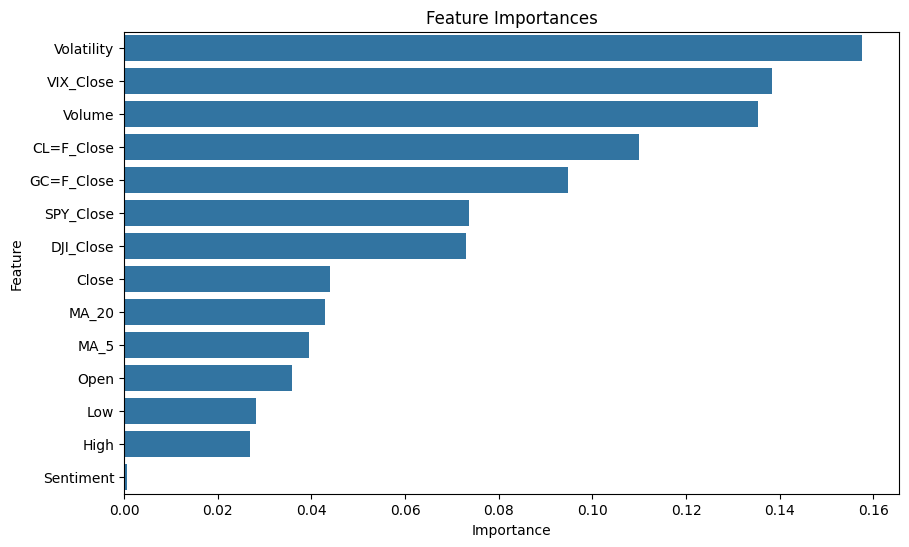

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R^2 Score: {r2_best}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Model Mean Squared Error: 0.00030369671113520595
Best Model R^2 Score: 0.3361400462387548


In [21]:
import joblib

# Save the best model to a file
model_path = 'data/processed/best_random_forest_model.pkl'
joblib.dump(best_model, model_path)
print(f'Best model saved to {model_path}')


Best model saved to data/processed/best_random_forest_model.pkl
